# Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# Importing Datasets

In [2]:
data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
data.shape

(421570, 5)

In [5]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.shape

(45, 3)

In [8]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
features.shape

(8190, 12)

In [11]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


NameError: name 'data' is not defined

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Handling missing values of features dataset

In [8]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [9]:
for i in range(1,6):
    features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
    features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Merging Training datasets and Merged Stores-Features Dataset

In [10]:
data = pd.merge(data,stores,on='Store',how='left')

In [11]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.sort_values(by=['Date'],inplace=True)

In [14]:
data.sort_values(by=['Date'],inplace=True)

In [15]:
data.set_index(data.Date, inplace=True)

In [16]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [17]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [26]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,0.0,0.0,0.0,214.471451,6.299,False
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False


# Splitting Date Column

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

C:\Users\Sharad\AppData\Local\Temp\ipykernel_9236\235201722.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,2010,2,5
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,2010,2,5
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,0.0,0.0,0.0,214.471451,6.299,False,2010,2,5
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,False,2010,2,5


# Outlier Detection and Abnormalities

In [19]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [20]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,4,87,2010-02-05,18721.90,A,205863,43.76,2.598,0.0,0.0,...,8.623,False,2010,2,5,20520.41,9016.78,14223.462308,13995.10,2402.605116
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323


In [22]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [23]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [34]:
data.shape

(421533, 20)

In [24]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

Negative Weekly Sales

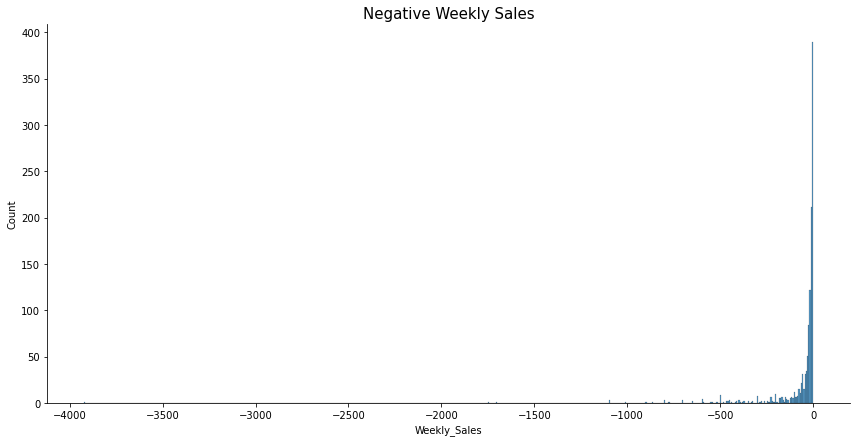

In [25]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [26]:
data=data[data['Weekly_Sales']>=0]

In [38]:
data.shape

(374247, 20)

In [27]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [40]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,4,87,2010-02-05,18721.90,A,205863,43.76,2.598,126.442065,8.623,0,2010,2,5,20520.41,9016.78,14223.462308,13995.10,2402.605116,0.00
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880,0.00
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710,0.00
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,138.728161,7.992,0,2012,10,43,9570.37,1790.78,3067.292937,2568.37,1450.166629,8090.93
2012-10-26,3,79,2012-10-26,7512.73,B,37392,74.66,3.506,226.987364,6.034,0,2012,10,43,9301.77,5612.96,7230.372448,7158.13,715.469506,567.35
2012-10-26,19,46,2012-10-26,18463.67,A,203819,56.49,4.071,138.728161,7.992,0,2012,10,43,47646.52,15075.39,20351.556643,20058.52,3650.092775,8090.93


In [41]:
data.to_csv('preprocessed_walmart_dataset.csv')



# Data Visuallizations


#### Average Monthly Sales



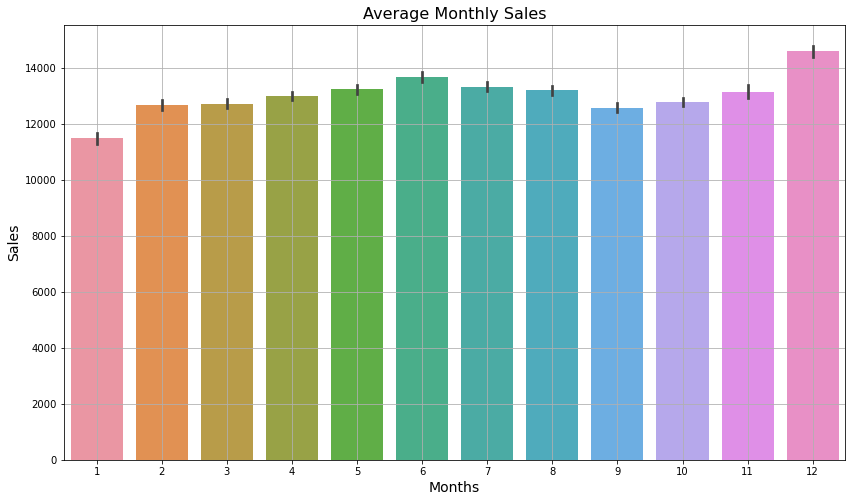

In [28]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

Monthly Sales of each Year

In [30]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


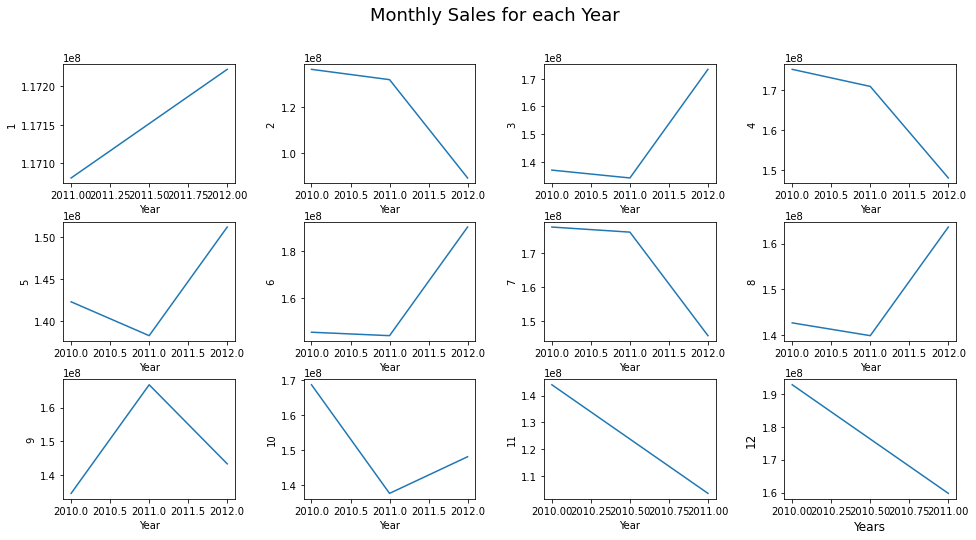

In [31]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1


plt.show()

#### Average Weekly Sales Storewise

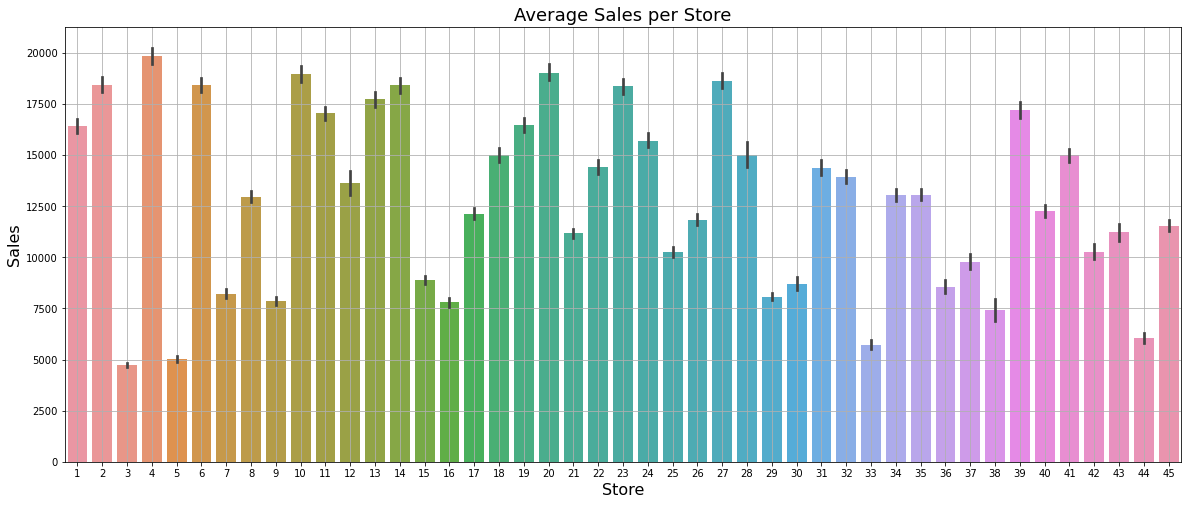

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

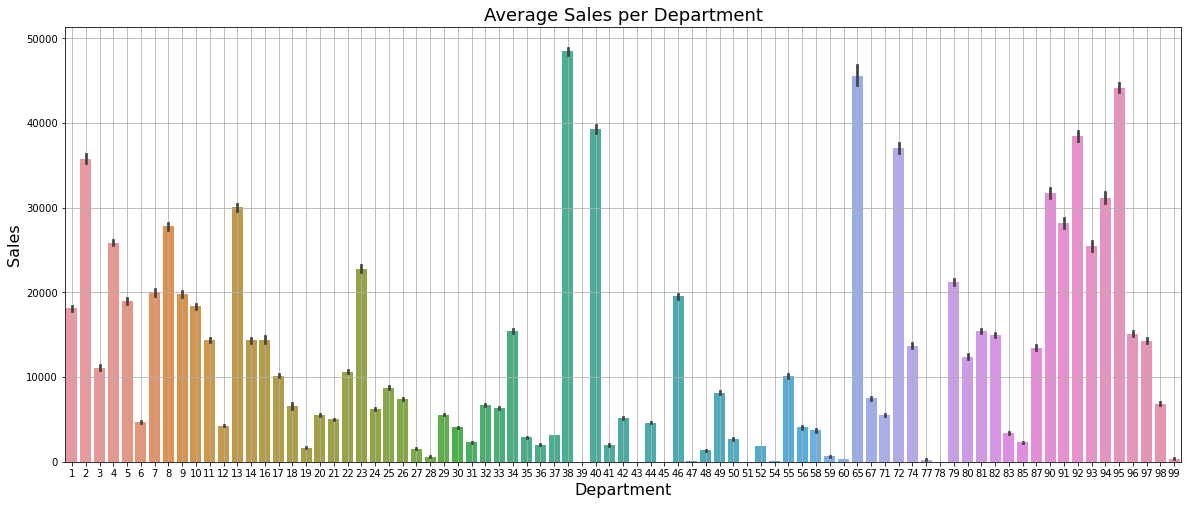

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

Sales Vs Temperature

C:\Users\Sharad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


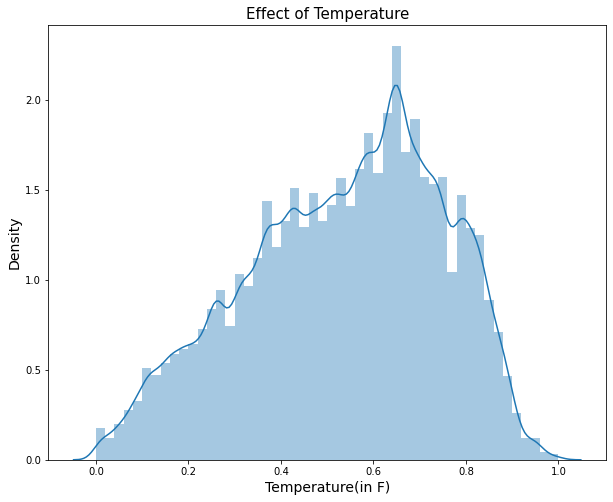

In [130]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature(in F)',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.show()

#### Holiday Distribution

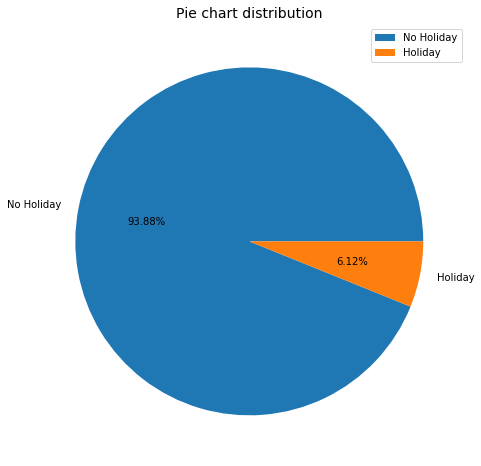

In [35]:

plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()

plt.show()


# Time Series Decompose

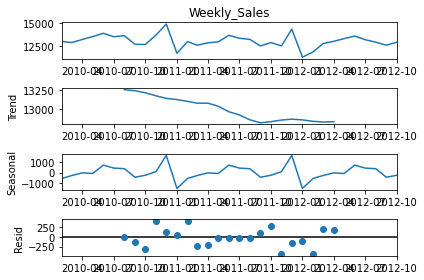

In [37]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

## One Hot Encoding

In [38]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [39]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,19,31,A
2012-10-26,3,79,B
2012-10-26,19,46,A
2012-10-26,19,27,A
2012-10-26,45,98,B


In [40]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)


In [41]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
data.shape

(374247, 20)

In [43]:
data = pd.concat([data,data_cat],axis =1)

In [44]:
data.shape

(374247, 149)

In [45]:
data.drop(columns=cat_col,inplace=True)


In [46]:
data.drop(columns=['Date'],inplace=True)


In [47]:
data.shape

(374247, 145)

# Data Normalization

In [48]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']


In [49]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [50]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,18721.90,205863,43.76,2.598,126.442065,8.623,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,15552.08,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,3200.22,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,10820.05,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [51]:
data = normalization(data.copy(),num_col)

In [52]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.050100,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.257324,0.925525,0.345332,0.063126,0.003737,0.571016,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.213756,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.043986,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.148717,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# Corelation between features of datasets 

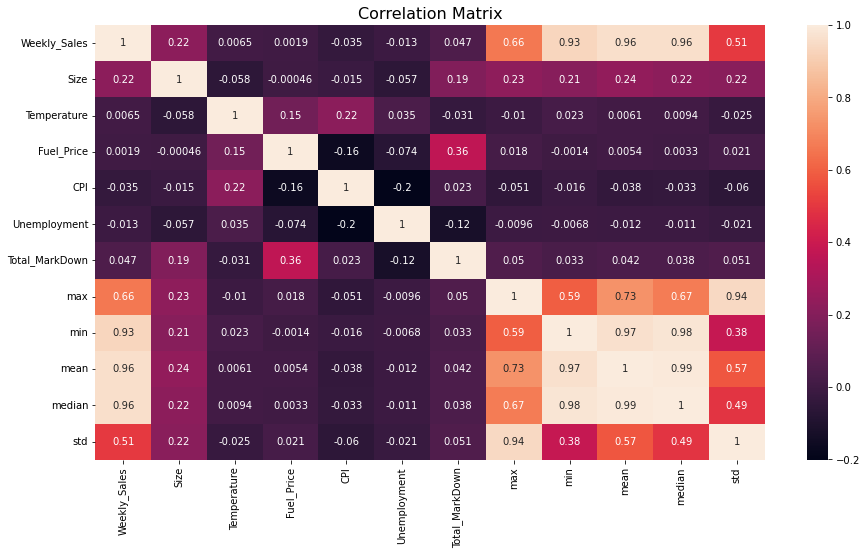

In [53]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Recursive Feature Elimination

In [54]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [55]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\Sharad\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=23, oob_score=True)

In [56]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,median,5.244765e-01
1,2,mean,4.037775e-01
2,3,Week,1.987440e-02
3,4,Temperature,8.822282e-03
4,5,max,6.041793e-03
...,...,...,...
139,140,Dept_51,3.049670e-10
140,141,Dept_45,1.806056e-10
141,142,Dept_78,3.782163e-12
142,143,Dept_39,6.813202e-15


In [57]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['median', 'mean', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_11', 'Dept_9', 'Year', 'Dept_1', 'Dept_5', 'Dept_56']


In [58]:
X = data[x]
Y = data['Weekly_Sales']

In [59]:
data = pd.concat([X,Y],axis=1)

In [75]:
data

,std,min,Dept_58,Dept_56,Dept_55,Dept_54,Dept_52,Dept_51,Dept_50,Dept_5,...,Dept_45,Dept_44,Dept_43,Dept_59,Dept_6,Dept_60,Dept_79,Dept_85,Dept_83,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.138276,0.253530,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.342576
2010-02-05,0.033713,0.181851,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.257324
2010-02-05,0.124444,0.151018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.213756
2010-02-05,0.042917,0.075239,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.043986
2010-02-05,0.181797,0.138033,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.148717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.020349,0.088028,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.042995
2012-10-26,0.010039,0.137655,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.103259
2012-10-26,0.051218,0.260516,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.253775


# Data Splitted into Training, Validation, Test

In [60]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [133]:
X

,median,mean,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,Dept_18,IsHoliday,Dept_3,Size,Dept_11,Dept_9,Year,Dept_1,Dept_5,Dept_56
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.173215,0.208157,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,0,0,0.630267,0,0,2010,1,0,0
2010-02-05,0.131110,0.131904,5,0.345332,0.031581,0.003737,0.063126,0.181851,0.571016,0.033713,...,0,0,0,0.925525,0,0,2010,0,0,0
2010-02-05,0.102392,0.120023,5,0.120065,0.106911,0.054008,0.158317,0.151018,0.744463,0.124444,...,0,0,0,0.318073,0,0,2010,0,1,0
2010-02-05,0.026217,0.031333,5,0.120065,0.040693,0.054008,0.158317,0.075239,0.744463,0.042917,...,0,0,0,0.318073,0,0,2010,0,0,0
2010-02-05,0.122502,0.156101,5,0.120065,0.153410,0.054008,0.158317,0.138033,0.744463,0.181797,...,0,0,0,0.318073,0,0,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.025144,0.029285,43,0.493149,0.014729,0.125179,0.801102,0.088028,0.495065,0.020349,...,0,0,0,0.914461,0,0,2012,0,0,0
2012-10-26,0.067707,0.067579,43,0.704134,0.014315,0.997574,0.518036,0.137655,0.259389,0.010039,...,0,0,0,0.013624,0,0,2012,0,0,0
2012-10-26,0.187339,0.188273,43,0.493149,0.073328,0.125179,0.801102,0.260516,0.495065,0.051218,...,0,0,0,0.914461,0,0,2012,0,0,0


In [134]:
Y

Date
2010-02-05    0.342576
2010-02-05    0.257324
2010-02-05    0.213756
2010-02-05    0.043986
2010-02-05    0.148717
                ...   
2012-10-26    0.042995
2012-10-26    0.103259
2012-10-26    0.253775
2012-10-26    0.043675
2012-10-26    0.014800
Name: Weekly_Sales, Length: 374247, dtype: float64

# Linear Regression Model

In [62]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  91.99697914094334


In [64]:
y_pred = lr.predict(X_test)

In [65]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030244102384805
MSE 0.0035838384133818763
RMSE 0.059865168615663954
R2 0.919972025288203


In [66]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.335204,0.461618
2010-07-09,0.097150,0.131949
2011-07-01,0.003508,0.011631
2012-01-06,0.081150,0.072653
2011-08-26,0.006916,0.030492
...,...,...
2011-01-28,0.000034,-0.010030
2010-08-20,0.008975,0.013981
2010-11-26,0.026455,0.028503


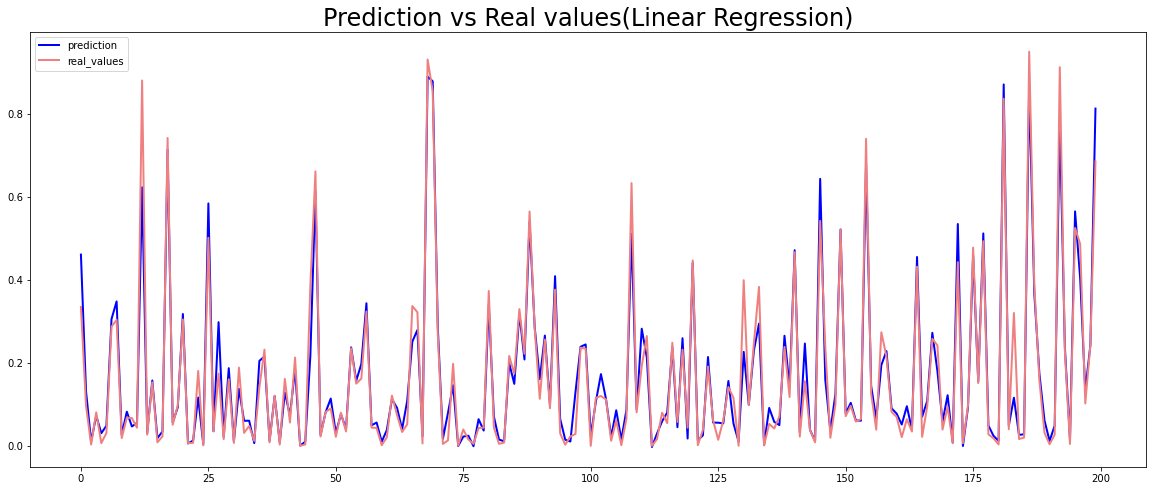

In [142]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title('Prediction vs Real values(Linear Regression)',fontsize= 24)
plt.show()

# Random Forest Regressor Model

In [68]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.78936357512521


In [70]:
y_pred = rf.predict(X_test)

In [71]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015652788820879657
MSE 0.000989946656020751
RMSE 0.03146341774220898
R2 0.9778936449672184


In [72]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.335204,0.362592
2010-07-09,0.097150,0.109223
2011-07-01,0.003508,0.004925
2012-01-06,0.081150,0.062868
2011-08-26,0.006916,0.008590
...,...,...
2011-01-28,0.000034,0.000083
2010-08-20,0.008975,0.009193
2010-11-26,0.026455,0.024328


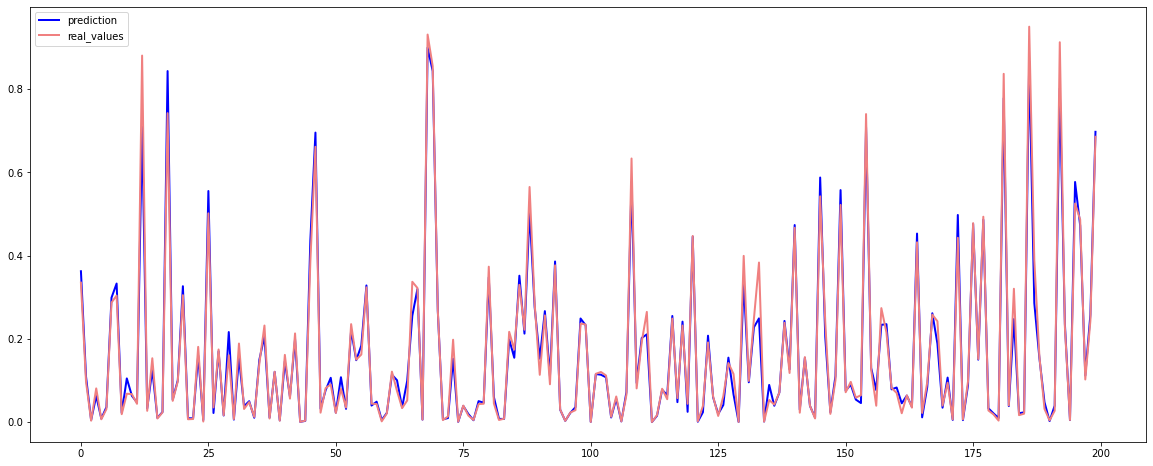

In [73]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

# K Neighbors Regressor Model

In [74]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [75]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeigbhbors Regressor Accuracy -  91.67383528046942


In [76]:
y_pred = knn.predict(X_test)

In [77]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03346343602908097
MSE 0.0037285456933715765
RMSE 0.061061818621554145
R2 0.9169838361100898


In [78]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.335204,0.491052
2010-07-09,0.097150,0.110391
2011-07-01,0.003508,0.005878
2012-01-06,0.081150,0.069880
2011-08-26,0.006916,0.012011
...,...,...
2011-01-28,0.000034,0.000137
2010-08-20,0.008975,0.004970
2010-11-26,0.026455,0.033908


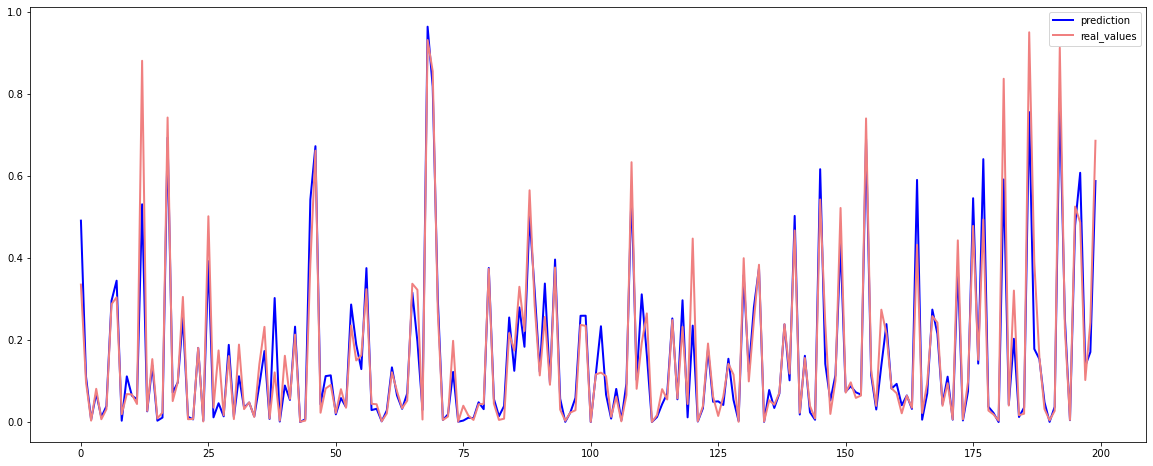

In [79]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

# XGboost Model

In [80]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [81]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.17374724297191


In [82]:
y_pred = xgbr.predict(X_test)

In [83]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.020195384508839235
MSE 0.0012656262397593718
RMSE 0.035575641101171625
R2 0.9717375296815178


In [84]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.335204,0.404160
2010-07-09,0.097150,0.128982
2011-07-01,0.003508,0.004509
2012-01-06,0.081150,0.071191
2011-08-26,0.006916,0.008820
...,...,...
2011-01-28,0.000034,0.001186
2010-08-20,0.008975,0.011092
2010-11-26,0.026455,0.023844


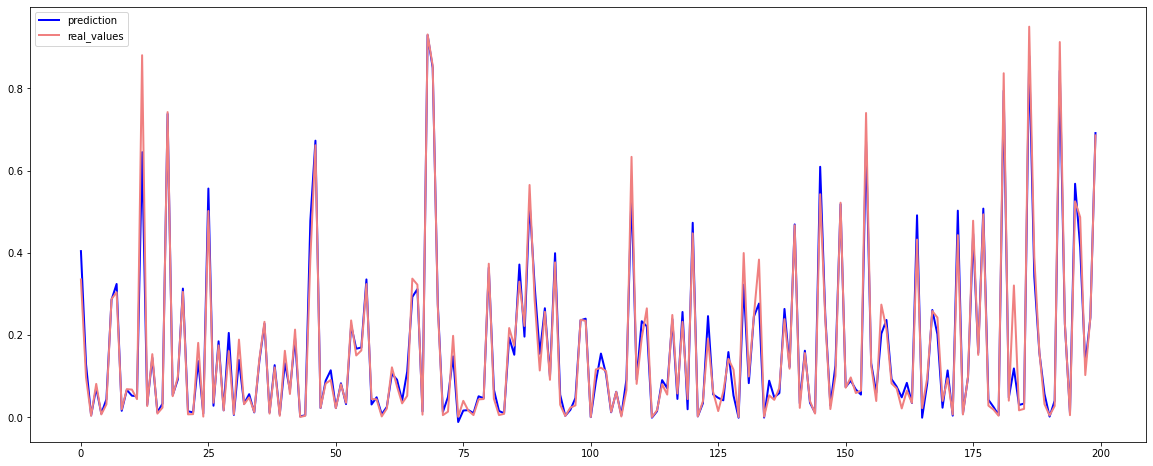

In [85]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

# Comparing Models

In [143]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}

In [144]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,91.996979
1,rf_acc,97.789364
2,knn_acc,91.673835
3,xgb_acc,97.173747


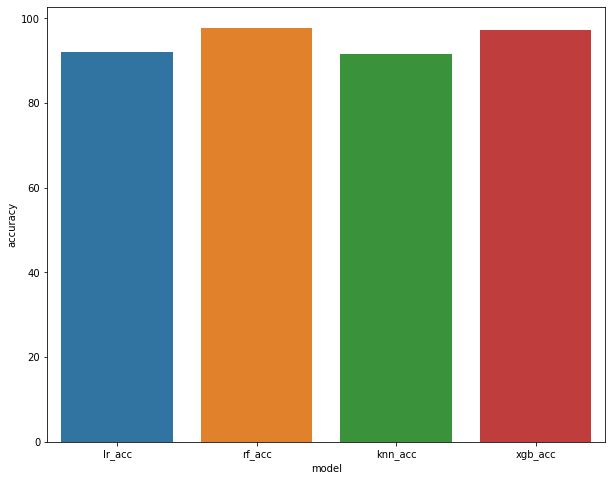

In [145]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()


In [98]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=50)

In [103]:
lr1 = LinearRegression(normalize=False)
lr1.fit(X_train, y_train)

LinearRegression()

In [104]:
lr_acc1 = lr1.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc1)

Linear Regressor Accuracy -  92.15677973857726


In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.40, random_state=50)

In [106]:
lr2 = LinearRegression(normalize=False)
lr2.fit(X_train, y_train)

LinearRegression()

In [107]:
lr_acc2 = lr2.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc2)

Linear Regressor Accuracy -  92.27143882178666


In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.50, random_state=50)

In [109]:
lr3 = LinearRegression(normalize=False)
lr3.fit(X_train, y_train)

LinearRegression()

In [110]:
lr_acc3 = lr3.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc3)

Linear Regressor Accuracy -  92.23218768464399


In [113]:
acc1 = {'model':['lr_acc','lr_acc1','lr_acc2','lr_acc3'],'accuracy':[lr_acc,lr_acc1,lr_acc2,lr_acc3]}

In [114]:
acc_df1 = pd.DataFrame(acc1)
acc_df1

,model,accuracy
0,lr_acc,91.996979
1,lr_acc1,92.156780
2,lr_acc2,92.271439
3,lr_acc3,92.232188


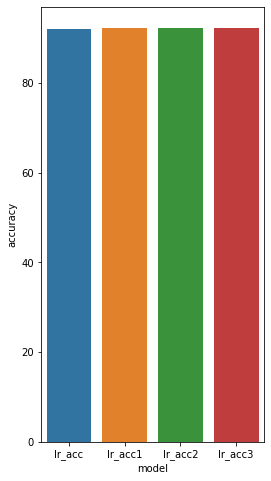

In [129]:
plt.figure(figsize=(4,8))
sns.barplot(x='model',y='accuracy',data=acc_df1)
plt.show()
